In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Functions that we'll need

def mad(inp):
  return np.median(np.abs(inp - np.median(inp)))

def incAzToLOS(inc, az):
  return

In [3]:
# Load GNSS data from UNR.
# Use GNSS data in North America reference frame
data_file = 'http://geodesy.unr.edu/velocities/midas.NA.txt'

In [4]:
# MIDAS velocity file format
column_names = [
    'ID',
    'MIDASversion',
    'first_epoch',
    'last_epoch',
    'duration_yrs',
    'N_epochs',
    'N_epochs_good',
    'N_vel_pairs',
    'Ve',
    'Vn',
    'Vu',
    'Se',
    'Sn',
    'Su',
    'E_initial_offset',
    'N_initial_offset',
    'U_initial_offset',
    'E_frac_outliers',
    'N_frac_outliers',
    'U_frac_outliers',
    'E_std_vel_pairs',
    'N_std_vel_pairs',
    'U_std_vel_pairs',
    'Nsteps',
    'lat',
    'lon',
    'hgt_m',
  ]

In [5]:
df = pd.read_csv(data_file, names=column_names, sep='\s+')

In [6]:
df.head()

,ID,MIDASversion,first_epoch,last_epoch,duration_yrs,N_epochs,N_epochs_good,N_vel_pairs,Ve,Vn,...,E_frac_outliers,N_frac_outliers,U_frac_outliers,E_std_vel_pairs,N_std_vel_pairs,U_std_vel_pairs,Nsteps,lat,lon,hgt_m
0,1LSU,MIDAS5,2003.3073,2024.2902,20.9829,7199,6228,8623,-0.000805,0.001503,...,0.042,0.044,0.057,0.003930,0.003065,0.008758,10,30.407425,-91.180262,-6.56646
1,1NSU,MIDAS5,2004.0411,2024.2902,20.2491,7274,7213,10928,-0.000807,0.002402,...,0.048,0.044,0.046,0.002117,0.002022,0.007338,4,31.750801,-93.097604,28.04620
2,1ULM,MIDAS5,2003.4497,2024.2902,20.8405,7375,7372,11250,-0.000549,0.001587,...,0.048,0.054,0.045,0.002181,0.001886,0.007473,4,32.529034,-92.075907,15.97255
3,299C,MIDAS5,2003.0308,2007.0856,4.0548,1408,1408,2159,0.006539,-0.001731,...,0.127,0.066,0.095,0.002195,0.001951,0.008442,0,64.028926,-142.075778,748.13639
4,3RIV,MIDAS5,1994.8172,2015.6715,20.8543,30,30,56,0.000401,-0.000723,...,0.000,0.143,0.125,0.000637,0.000428,0.001442,0,46.314763,-72.576085,-21.73074


In [7]:
# Define the region of interst (AOI)
lat_north = 44
lat_south = 40
lon_west = -95
lon_east = -90

In [8]:
mask = (df['lat'] < lat_north) & (df['lat'] > lat_south) & (df['lon'] < lon_east) & (df['lon'] > lon_west)
df_bbox = df[mask]
print(len(df_bbox))
df_bbox.head()

189


,ID,MIDASversion,first_epoch,last_epoch,duration_yrs,N_epochs,N_epochs_good,N_vel_pairs,Ve,Vn,...,E_frac_outliers,N_frac_outliers,U_frac_outliers,E_std_vel_pairs,N_std_vel_pairs,U_std_vel_pairs,Nsteps,lat,lon,hgt_m
249,ALBL,MIDAS5,2013.4921,2015.1786,1.6865,601,490,490,-0.000424,0.001209,...,0.020,0.029,0.067,0.001785,0.001849,0.006682,0,43.676566,-93.329738,371.52002
305,AMES,MIDAS5,2014.5489,2016.2601,1.7112,609,505,505,0.000973,0.003308,...,0.097,0.139,0.055,0.002048,0.002114,0.005998,0,41.983130,-93.683558,288.21775
740,BLRW,MIDAS5,1999.5702,2010.6858,11.1156,3507,3507,6556,0.000206,0.000689,...,0.106,0.083,0.059,0.003326,0.002656,0.008880,0,43.230253,-90.530780,190.66125
1556,DOLE,MIDAS5,2010.2286,2024.2875,14.0589,4468,4468,8506,0.000277,0.001024,...,0.050,0.044,0.052,0.001842,0.001800,0.006756,0,42.978123,-90.128172,348.14280
1710,ELKT,MIDAS5,2008.1533,2024.3778,16.2245,4873,4873,9360,0.000219,0.000902,...,0.079,0.047,0.054,0.002050,0.002148,0.007240,0,43.658339,-92.688743,402.74655


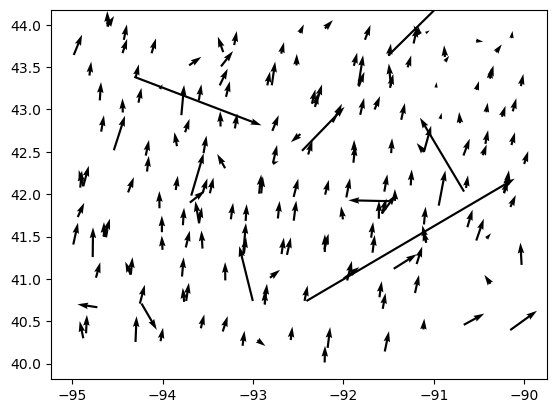

In [9]:
plt.quiver(df_bbox['lon'], df_bbox['lat'], df_bbox['Ve'], df_bbox['Vn'])

In [10]:
# Need to remove outlier velocities
mean_ve = df_bbox['Ve'].mean()
mean_vn = df_bbox['Vn'].mean()
std_ve = df_bbox['Ve'].std()
std_vn = df_bbox['Vn'].std()

print('Mean easting velocity: {:.2f} mm/yr'.format(mean_ve*1000))
print('Mean northing velocity: {:.2f} mm/yr'.format(mean_vn*1000))
print('Std easting velocity: {:.2f} mm/yr'.format(std_ve*1000))
print('Std northing velocity: {:.2f} mm/yr'.format(std_vn*1000))

Mean easting velocity: 0.39 mm/yr
Mean northing velocity: 1.27 mm/yr
Std easting velocity: 1.59 mm/yr
Std northing velocity: 1.11 mm/yr


In [11]:
print('Mean sigma_east: {:.2f} mm/yr'.format(df_bbox['Se'].mean()*1000))
print('Mean sigma_north: {:.2f} mm/yr'.format(df_bbox['Sn'].mean()*1000))

Mean sigma_east: 0.27 mm/yr
Mean sigma_north: 0.27 mm/yr


In [12]:
outlier_mask_1 = (df_bbox['Ve'] > mean_ve + 2 * std_ve) | (df_bbox['Ve'] < mean_ve - 2 * std_ve) | (df_bbox['Vn'] > mean_vn + 2 * std_vn) | (df_bbox['Vn'] < mean_vn - 2 * std_vn)
outlier_mask_2 = (df_bbox['Se']*1000 > 1) | (df_bbox['Sn']*1000 > 1)
outlier_mask_3 = df_bbox['duration_yrs'] < 5
outlier_mask_4 = df_bbox['N_epochs_good'] < 1000

outlier_mask_5 = df_bbox['Vn'] < 0 # this will only work for NA-reference velocities in this area

print(len(df_bbox))
print(np.sum(outlier_mask_1))
print(np.sum(outlier_mask_2))
print(np.sum(outlier_mask_3))
print(np.sum(outlier_mask_4))
print(np.sum(outlier_mask_5))

outlier_mask = outlier_mask_1 | outlier_mask_2 | outlier_mask_3 | outlier_mask_4 | outlier_mask_5

189
7
2
24
17
5


In [13]:
df_clean = df_bbox[~outlier_mask]

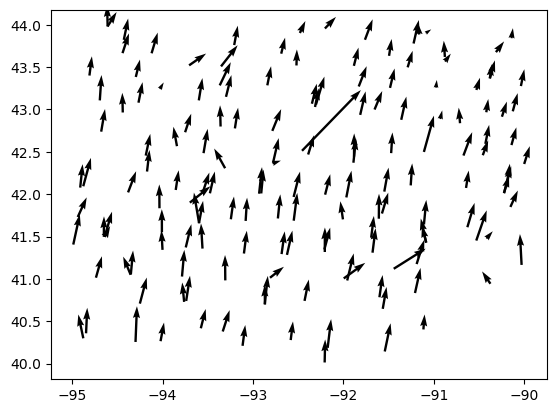

In [14]:
plt.quiver(df_clean['lon'], df_clean['lat'], df_clean['Ve'], df_clean['Vn'])

In [15]:
print('Mean easting velocity is {:.2f} mm/yr'.format(np.median(df_clean['Ve'] * 1000)))
print('Mean northing velocity is {:.2f} mm/yr'.format(np.median(df_clean['Vn'] * 1000)))

print('Mean sigma_east is {:.2f} mm/yr'.format(np.median(df_clean['Se'] * 1000)))
print('Mean sigma_north is {:.2f} mm/yr'.format(np.median(df_clean['Sn'] * 1000)))

print('Variablity in Veast is {:.2f} mm/yr'.format(mad(df_clean['Ve'] * 1000)))
print('Variablity in Vnorth is {:.2f} mm/yr'.format(mad(df_clean['Vn'] * 1000)))

print('Std of Veast is {:.2f} mm/yr'.format(df_clean['Ve'].std() * 1000))
print('Std of Veast is {:.2f} mm/yr'.format(df_clean['Vn'].std() * 1000))

Mean easting velocity is 0.22 mm/yr
Mean northing velocity is 1.19 mm/yr
Mean sigma_east is 0.20 mm/yr
Mean sigma_north is 0.19 mm/yr
Variablity in Veast is 0.11 mm/yr
Variablity in Vnorth is 0.17 mm/yr
Std of Veast is 0.37 mm/yr
Std of Veast is 0.36 mm/yr


Steps:
1. Remove stations with errors OR with high uncertainty
2. Project velocities into the line-of-sight of our insar velocities
3. Put the Insar velocities into the GNSS frame of reference
  - solve for a plane parameter of the difference

In [ ]:
# Need to calculate the LOS vectors from incidence and heading rasters
inc_raster = None
az_raster = None

LOSx, LOSy, LOSz = None, None, None

LOS velocity is what you need to compare GNSS velocities with InSAR velocities and put the InSAR velocities into an absolute reference frame (i.e. not relative to the reference pixel anymore). 

In [ ]:
los_vel = df_clean['Ve'] * LOSx + df_clean['Vn'] * LOSy + df_clean['Vu'] * LOSz